### Install the requirements using

`!pip install -r requirements.txt`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 1  Loading the csv file.  

In [2]:
cols = ['bookID' ,'title',  'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count',      
        'text_reviews_count', 'publication_date', 'publisher',  'coauthor']
df = pd.read_csv(r'books_data.csv', names=cols, skiprows=1,engine='python', quotechar=',', on_bad_lines='warn')

#### Note we have used quoting charcter ',' to prevent quoting issues.
####  Also engine is python. It is used when no of columns are variable.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  coauthor            4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [4]:
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,None
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,None


###  Step 2 Remove dirty data for four rows.

#### As we can see the last column is problematic. Its is actually a co author name. But this co author name is present for only four rows in the datsset. 

#### Lets examine those four rows. 

In [5]:
dirty = df.loc[~df['coauthor'].isnull(), : ]

In [6]:
dirty

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t
5877,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.


#### The average rating for these four rows is actaully a author name. 

In [7]:
coauthor = dirty.loc[:, 'average_rating']
coauthor = coauthor.rename("author2")

#### We will shift every other column to the left and we call this right side of data frame. 

In [8]:
right = dirty.loc[:, 'average_rating':'coauthor'].shift(periods=-1, axis=1)

#### All the other columns before author and taken as left. 

In [9]:
left = dirty.loc[:, :'authors']

#### We will merge the co author with author.  

In [10]:
left['authors'] = left['authors'] + coauthor

#### The left side will look like this. 

In [11]:
left

,bookID,title,authors
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner Jr./Sam B. Warner
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net one o...
5877,22128,Patriots (The Coming Collapse),James Wesley Rawles
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown Son & Ferguson


#### The Right side

In [12]:
right

,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
3348,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press,None
4702,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t,None
5877,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers,None
8979,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.,None


####  We will combine them. and call it clean. 

In [13]:
clean = pd.concat([left,  right, coauthor], axis=1)

In [14]:
clean = clean.drop(columns= ['coauthor'])

In [15]:
clean

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author2
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press,Jr./Sam B. Warner
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net one o...,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t,one of the founding members of this Tolkien w...
5877,22128,Patriots (The Coming Collapse),James Wesley Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers,Rawles
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.,Son & Ferguson


#### We will replace the dirty rows with this newly created clean data frame. 

In [16]:
df.loc[clean.index, :] = clean

### Step 3 We will remove 'coauthor', 'bookID', 'isbn', 'isbn13' columns as they do not make any sense wrt to rating prediction. 

In [17]:
df = df.drop(columns= ['coauthor', 'bookID', 'isbn', 'isbn13'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11127 non-null  object
 1   authors             11127 non-null  object
 2   average_rating      11127 non-null  object
 3   language_code       11127 non-null  object
 4   num_pages           11127 non-null  object
 5   ratings_count       11127 non-null  int64 
 6   text_reviews_count  11127 non-null  object
 7   publication_date    11127 non-null  object
 8   publisher           11127 non-null  object
dtypes: int64(1), object(8)
memory usage: 782.5+ KB


### Step 4 We will also convert the numeric columns to int/ float values. 

In [19]:
df['average_rating'] = df['average_rating'].astype(np.float32)
df['num_pages'] = df['num_pages'].astype(np.int32)
df['ratings_count'] = df['ratings_count'].astype(np.int32)
df['text_reviews_count'] = df['text_reviews_count'].astype(np.int32)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float32
 3   language_code       11127 non-null  object 
 4   num_pages           11127 non-null  int32  
 5   ratings_count       11127 non-null  int32  
 6   text_reviews_count  11127 non-null  int32  
 7   publication_date    11127 non-null  object 
 8   publisher           11127 non-null  object 
dtypes: float32(1), int32(3), object(5)
memory usage: 608.6+ KB


#### Let's just check our plan worked or not! 

In [21]:
df.iloc[3348, :]

title                 Streetcar Suburbs: The Process of Growth in Bo...
authors                               Sam Bass Warner Jr./Sam B. Warner
average_rating                                                     3.58
language_code                                                     en-US
num_pages                                                           236
ratings_count                                                        61
text_reviews_count                                                    6
publication_date                                              4/20/2004
publisher                                      Harvard University Press
Name: 3348, dtype: object

### Step 4 It did Now let's convert dates 

In [22]:
dates = pd.to_datetime(df.publication_date, format="%m/%d/%Y", errors="coerce")

In [23]:
dates[dates.isnull()]

8180    NaT
11098   NaT
Name: publication_date, dtype: datetime64[ns]

#### These two rows contain dirty values for dates. 

In [24]:
df.publication_date[8180]

'11/31/2000'

In [25]:
df.publication_date[11098]

'6/31/1982'

#### Let us correct it. And parse again. 

In [26]:
df.iloc[8180, 7] = '11/30/2000' 
df.iloc[11098, 7] = '6/30/1982'

df.publication_date = pd.to_datetime(df.publication_date, format="%m/%d/%Y", errors="raise")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11127 non-null  object        
 1   authors             11127 non-null  object        
 2   average_rating      11127 non-null  float32       
 3   language_code       11127 non-null  object        
 4   num_pages           11127 non-null  int32         
 5   ratings_count       11127 non-null  int32         
 6   text_reviews_count  11127 non-null  int32         
 7   publication_date    11127 non-null  datetime64[ns]
 8   publisher           11127 non-null  object        
dtypes: datetime64[ns](1), float32(1), int32(3), object(4)
memory usage: 608.6+ KB


### Lets Find out, in which Year Maximum books were published

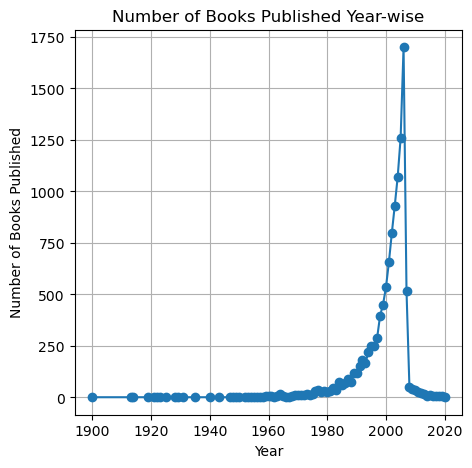

In [28]:
# Extract the year from the 'date' column
df['year'] = df['publication_date'].dt.year

books_published_per_year = df.groupby('year').size()

# Create the line graph
plt.figure(figsize=(5,5))
books_published_per_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.title('Number of Books Published Year-wise')
plt.grid()
plt.show()

So here we see, maximum of the books present in the dataset was published between 2005 -2006

#### Now we wil subtract datetime object with 01/01/1970 to obtain an integer. 

In [29]:
over_years = df.groupby(pd.Grouper(key='publication_date', axis=0, freq='1Y')).mean().fillna(0).loc[:, 'average_rating']

C:\Users\DEEPANSHU\AppData\Local\Temp\ipykernel_30680\3009904849.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_years = df.groupby(pd.Grouper(key='publication_date', axis=0, freq='1Y')).mean().fillna(0).loc[:, 'average_rating']


<Axes: xlabel='publication_date'>

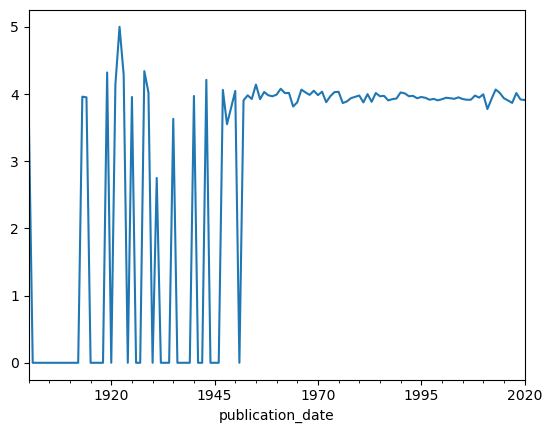

In [30]:
over_years.plot()

In [31]:
over_monthwise = df.groupby(pd.Grouper(key='publication_date', axis=0, freq='1M')).mean().fillna(0).loc[:, 'average_rating']

C:\Users\DEEPANSHU\AppData\Local\Temp\ipykernel_30680\4018826329.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_monthwise = df.groupby(pd.Grouper(key='publication_date', axis=0, freq='1M')).mean().fillna(0).loc[:, 'average_rating']


In [32]:
over_monthwise.head(2)

publication_date
1900-01-31    3.88
1900-02-28    0.00
Freq: M, Name: average_rating, dtype: float32

<Axes: xlabel='publication_date'>

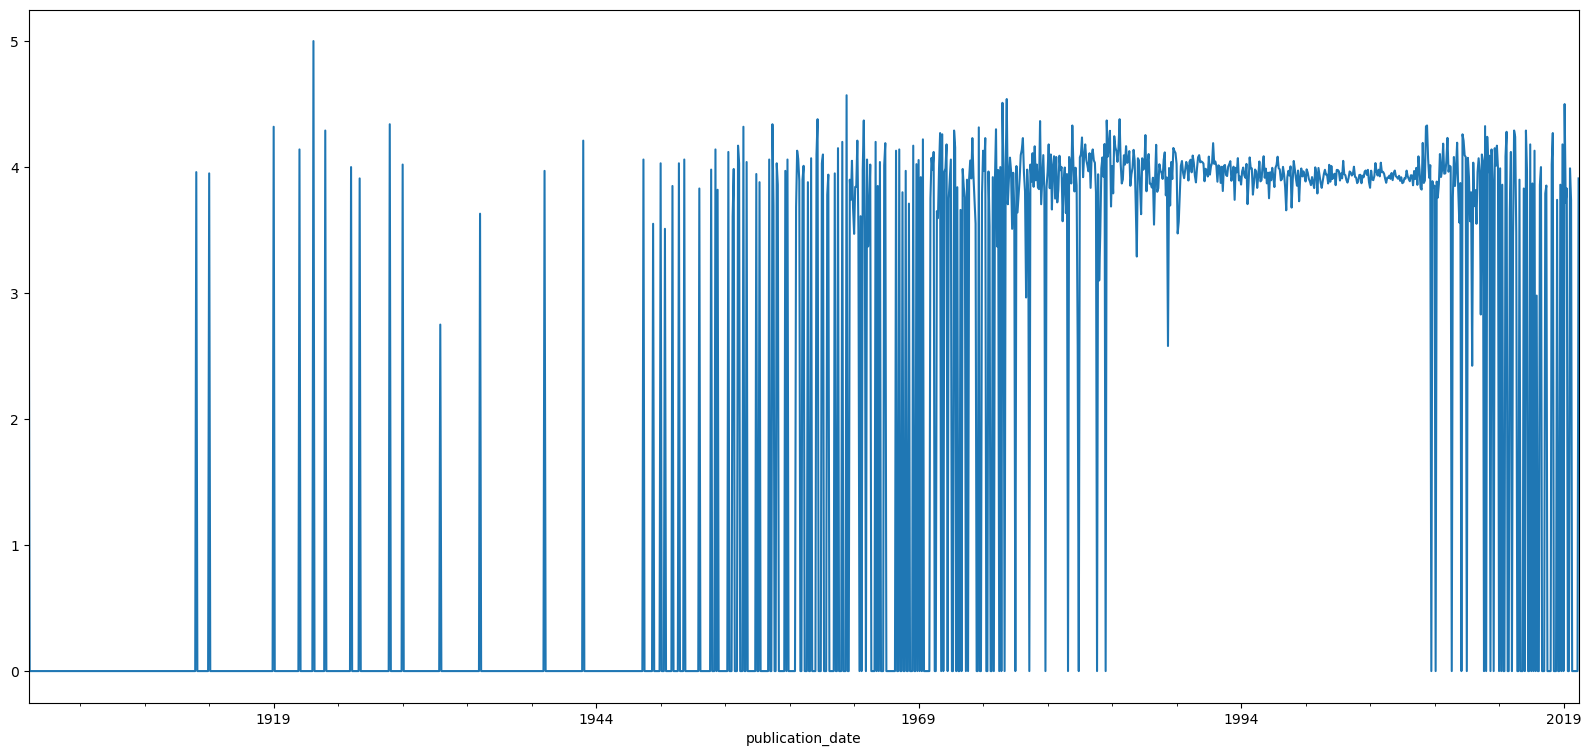

In [33]:
over_monthwise.plot(figsize=(20, 9))

In [34]:
type(over_monthwise)

pandas.core.series.Series

In [35]:
over_months = df.groupby(df.publication_date.dt.month)['average_rating'].median()
over_months

publication_date
1     3.970
2     3.960
3     3.940
4     3.950
5     3.930
6     3.965
7     3.940
8     3.950
9     3.970
10    3.970
11    3.990
12    3.960
Name: average_rating, dtype: float32

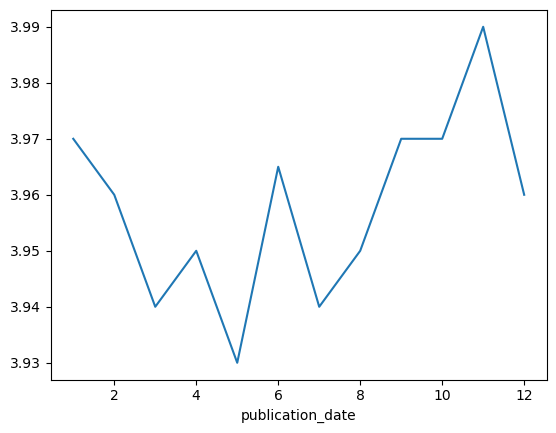

In [36]:
%matplotlib inline
over_months.plot();

In [37]:
df['publication_date_delta'] = (df.publication_date - pd.to_datetime('1900-01-01', format='%Y-%m-%d')).dt.days

<Axes: xlabel='publication_date_delta', ylabel='average_rating'>

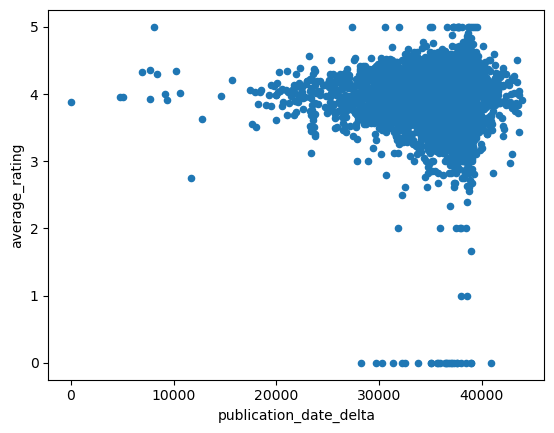

In [38]:
df.plot.scatter(x='publication_date_delta', y='average_rating')

In [39]:
df['publication_year'] = df.publication_date.dt.year - 1900
df['publication_month'] = (df.publication_date.dt.year - 1900)*12 + df.publication_date.dt.month

df = df.drop(columns=['publication_date_delta', 'publication_date'])

<Axes: xlabel='num_pages', ylabel='average_rating'>

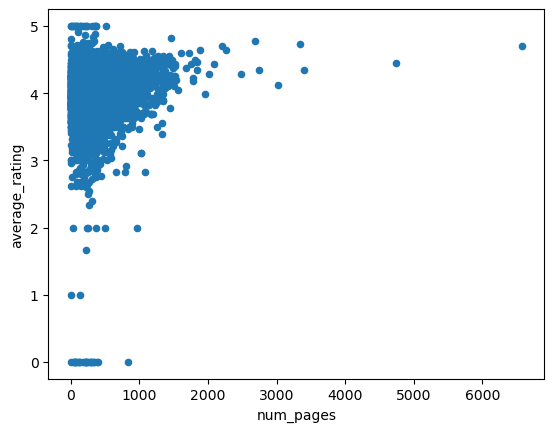

In [40]:
df.plot.scatter(x='num_pages', y='average_rating')

<Axes: xlabel='text_reviews_count', ylabel='average_rating'>

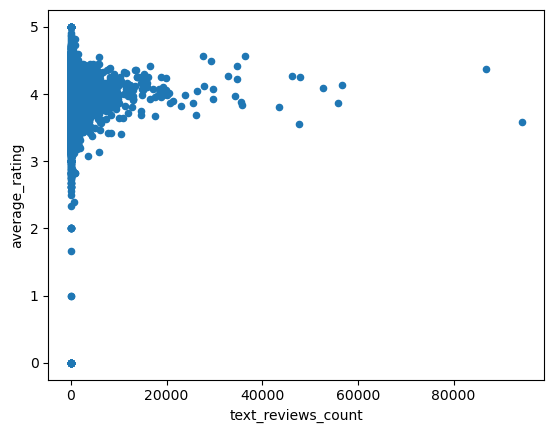

In [41]:
df.plot.scatter(x='text_reviews_count', y='average_rating')

<Axes: xlabel='ratings_count', ylabel='average_rating'>

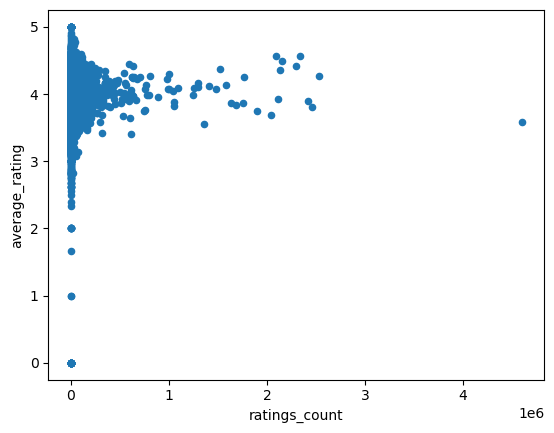

In [42]:
df.plot.scatter(x='ratings_count', y='average_rating')

### Step5 Now Let's  separate out all the co authors. Co authors are separted by a /. 

In [43]:
author_name=[]
for i in range(1, df["authors"].str.split("/", expand=True).shape[1] +1):
    author_name.append(f"Author_{i}") 
    

In [44]:
splitted = df["authors"].str.split("/", expand=True)

In [45]:
splitted.columns = author_name

In [46]:
df  = pd.concat((df, splitted), axis=1)

In [47]:
 df = df.drop(columns= ['authors'])

In [48]:
df.head(2)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,publication_year,publication_month,...,Author_42,Author_43,Author_44,Author_45,Author_46,Author_47,Author_48,Author_49,Author_50,Author_51
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,Scholastic Inc.,2006,106,1281,...,None,None,None,None,None,None,None,None,None,None
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,Scholastic Inc.,2004,104,1257,...,None,None,None,None,None,None,None,None,None,None


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   average_rating      11127 non-null  float32
 2   language_code       11127 non-null  object 
 3   num_pages           11127 non-null  int32  
 4   ratings_count       11127 non-null  int32  
 5   text_reviews_count  11127 non-null  int32  
 6   publisher           11127 non-null  object 
 7   year                11127 non-null  int64  
 8   publication_year    11127 non-null  int64  
 9   publication_month   11127 non-null  int64  
 10  Author_1            11127 non-null  object 
 11  Author_2            4564 non-null   object 
 12  Author_3            1485 non-null   object 
 13  Author_4            479 non-null    object 
 14  Author_5            257 non-null    object 
 15  Author_6            192 non-null    object 
 16  Auth

In [50]:
df.columns

Index(['title', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'year',
       'publication_year', 'publication_month', 'Author_1', 'Author_2',
       'Author_3', 'Author_4', 'Author_5', 'Author_6', 'Author_7', 'Author_8',
       'Author_9', 'Author_10', 'Author_11', 'Author_12', 'Author_13',
       'Author_14', 'Author_15', 'Author_16', 'Author_17', 'Author_18',
       'Author_19', 'Author_20', 'Author_21', 'Author_22', 'Author_23',
       'Author_24', 'Author_25', 'Author_26', 'Author_27', 'Author_28',
       'Author_29', 'Author_30', 'Author_31', 'Author_32', 'Author_33',
       'Author_34', 'Author_35', 'Author_36', 'Author_37', 'Author_38',
       'Author_39', 'Author_40', 'Author_41', 'Author_42', 'Author_43',
       'Author_44', 'Author_45', 'Author_46', 'Author_47', 'Author_48',
       'Author_49', 'Author_50', 'Author_51'],
      dtype='object')

###  Step6 Lets calculate top 5 authors with highest rating

In [51]:
df.sort_values('average_rating', ascending=False).head(2)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,publication_year,publication_month,...,Author_42,Author_43,Author_44,Author_45,Author_46,Author_47,Author_48,Author_49,Author_50,Author_51
5650,Colossians and Philemon: A Critical and Exeget...,5.0,eng,512,1,0,T&T Clark Int'l,2005,105,1272,...,None,None,None,None,None,None,None,None,None,None
1243,Middlesex Borough (Images of America: New Jersey),5.0,eng,128,2,0,Arcadia Publishing,2003,103,1239,...,None,None,None,None,None,None,None,None,None,None


####  We take the higest rated records and filter out records with rating > 4. 


In [52]:
most_rated_records = df.sort_values(['ratings_count'], ascending=[False])
top_authors_total = most_rated_records.loc[most_rated_records.loc[:, 'average_rating'] > 4.0, :]
# top_authors_total = largel_ratings.sort_values(['average_rating'], ascending=[False])

In [53]:
top_authors_total.head(4)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,publication_year,publication_month,...,Author_42,Author_43,Author_44,Author_45,Author_46,Author_47,Author_48,Author_49,Author_50,Author_51
1697,The Hobbit or There and Back Again,4.27,eng,366,2530894,32871,Houghton Mifflin,2002,102,1232,...,None,None,None,None,None,None,None,None,None,None
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,Scholastic Inc.,2004,104,1253,...,None,None,None,None,None,None,None,None,None,None
4416,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,341,2293963,34692,Arthur A. Levine Books / Scholastic Inc.,1999,99,1194,...,None,None,None,None,None,None,None,None,None,None
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,Scholastic Inc.,2004,104,1257,...,None,None,None,None,None,None,None,None,None,None


### Books with the highest average rating

Looking at the just the top 10 books doesnt make sense. As there are more than 10 books with highest average rating i.e 5.0. Let's pull out a list of books with the average rating of 5.0

In [54]:
# Let's look at the top 10 rated books
df.sort_values('average_rating',ascending=False)
#Check the max average rating
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,year,publication_year,publication_month
count,11127.000000,11127.000000,1.112700e+04,11127.000000,11127.000000,11127.000000,11127.000000
mean,3.933631,336.376921,1.793641e+04,541.854498,2000.167520,100.167520,1208.557023
std,0.352446,241.127305,1.124794e+05,2576.176608,8.248836,8.248836,99.122542
min,0.000000,0.000000,0.000000e+00,0.000000,1900.000000,0.000000,1.000000
25%,3.770000,192.000000,1.040000e+02,9.000000,1998.000000,98.000000,1183.000000
50%,3.960000,299.000000,7.450000e+02,46.000000,2003.000000,103.000000,1239.000000
75%,4.135000,416.000000,4.993500e+03,237.500000,2005.000000,105.000000,1269.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000,120.000000,1443.000000


Here, we see for books the highest average rating is 5.0. Now, we draw a list of the books with rating 5.0

In [55]:
books_highAverageRating=df.loc[(df.loc[:,'average_rating']==5),'title']
list_book=pd.DataFrame(books_highAverageRating).sort_values('title')
list_book.reset_index()

,index,title
0,10266,Bill Gates: Computer Legend (Famous Lives)
1,4935,Bulgakov's the Master and Margarita: The Text ...
2,5650,Colossians and Philemon: A Critical and Exeget...
3,624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
4,6778,Delwau Duon: Peintiadau Nicholas Evans = Symph...
5,8547,Fanning the Flame: Bible Cross and Mission
6,9897,His Princess Devotional: A Royal Encounter Wit...
7,855,Literature Circle Guide: Bridge to Terabithia:...
8,1243,Middlesex Borough (Images of America: New Jersey)
9,9286,Oliver Wendell Holmes in Paris: Medicine Theo...


There are 22 books with average rating of 5.0

### Lets find out the Top 20 most read books based on ratings count -The Popular Books among readers

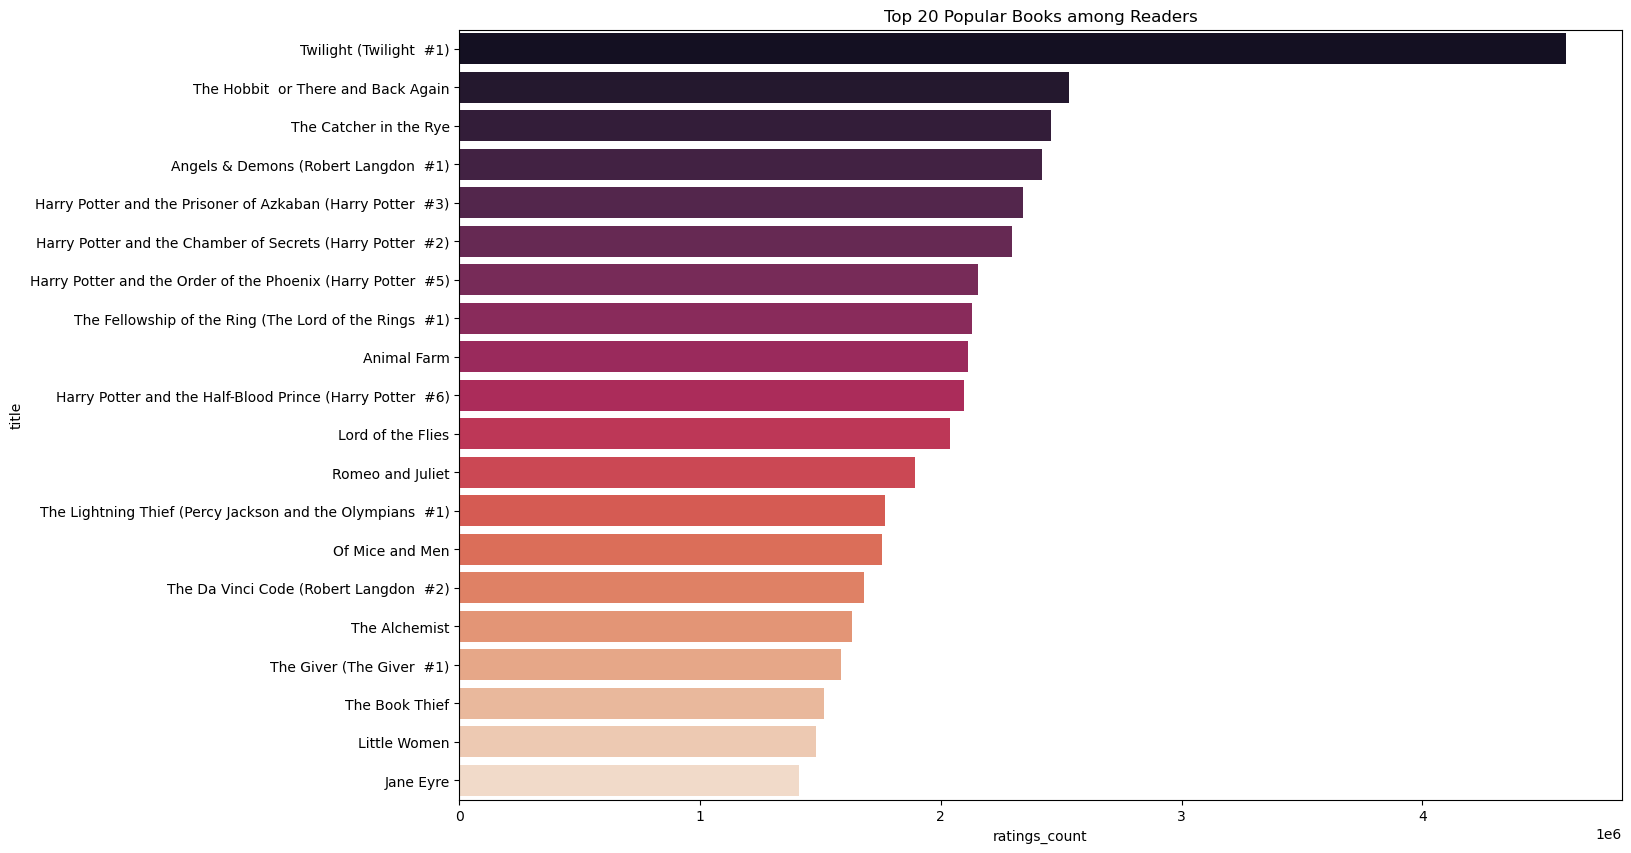

In [56]:
# Let's look at the top 20 rated books
top_20 = df.sort_values('ratings_count', ascending=False).head(20).set_index('title')

plt.figure(figsize=(15,10))
sns.barplot(x=top_20['ratings_count'], y=top_20.index, palette='rocket').set(title='Top 20 Popular Books among Readers');

Its interesting to note that the list of popular books 20 based on ratings count is completely different from the list of books that have the higest average rating of 5.0.
Let's check what is the average rating of the above 20 books

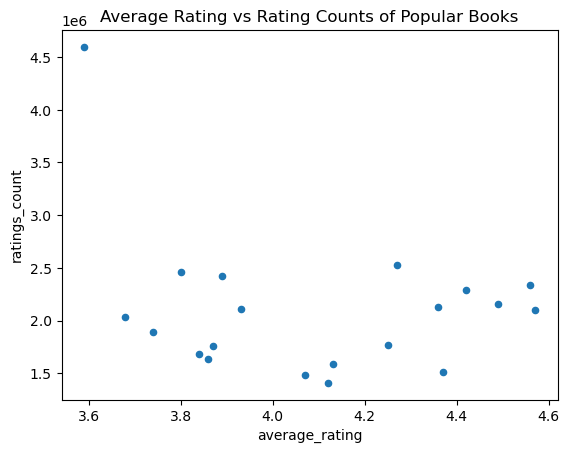

In [57]:
#Scatter plot for Average Ratinga and Ratings Count of Top 20 Popular Books
top_20.plot.scatter(x='average_rating', y='ratings_count', title='Average Rating vs Rating Counts of Popular Books');

1e6 represents million. The popular books does not necessarily have the highest rating. The rating of the top 20 popular books among readers have an average rating between 3.6 to 4.6

#### Get top 50 authors and co authors from them. 

In [58]:
n_coauthors = 51
top_authors = set()
for i in range(1, n_coauthors+1):
    top_authors = top_authors.union(set(top_authors_total.head(50)['Author_'+ str(i)]))

In [59]:
try:
    top_authors.remove(None)
    top_authors.remove('Anonymous')
except KeyError:
    pass

In [60]:
top_authors = list(top_authors)

In [61]:
top_authors

['Alice Walker',
 'Diana Gabaldon',
 'Garth Williams',
 'Michael Crichton',
 'Jane Austen',
 'Arthur Golden',
 'Sara Gruen',
 'Stephen King',
 'Rick Riordan',
 'Frances Hodgson Burnett',
 'J.K. Rowling',
 'Lois Lowry',
 'Dave McKean',
 'Michael Mason',
 'Jim Collins',
 'Cao Xuân Việt Khương',
 'Nicholas Sparks',
 'Peter S. Beagle',
 'William Goldman',
 'John Grogan',
 'Markus Zusak',
 'William Shakespeare',
 'Neil Gaiman',
 'George R.R. Martin',
 'Richard S. Hartmetz',
 'James Kinsley',
 'Sue Monk Kidd',
 'Alexandre Dumas',
 'Robin Waterfield',
 'Quentin Blake',
 'Harold Bloom',
 'Mary GrandPré',
 'Jeffrey Eugenides',
 'Jodi Picoult',
 'Agatha Christie',
 'Charlotte Brontë',
 'Martin Gardner',
 'Rosemary Wells',
 'L.M. Montgomery',
 'E.B. White',
 'Margaret Mitchell',
 'Barbara Kingsolver',
 'Rex Gibson',
 'Anita Diamant',
 'J.R.R. Tolkien',
 'Fyodor Dostoyevsky',
 'Anna Massey',
 'Stephen R. Covey',
 'David McDuff',
 'Lewis Carroll',
 'Maurgaux Motin',
 'Louisa May Alcott',
 'John Ten

###  Step6 We calculate top publishers as above

In [62]:

most_rated_records = df.sort_values(['ratings_count'], ascending=[False])
top_publishers_total = most_rated_records.loc[most_rated_records.loc[:, 'average_rating'] > 4.0, :]


In [63]:
top_publishers = list(set(top_publishers_total.head(50)['publisher']))

In [64]:
top_publishers

['Alfred A. Knopf',
 'Houghton Mifflin',
 'Arthur A. Levine Books / Scholastic Inc.',
 'Scholastic Inc.',
 'Signet Classics',
 'Plaza y Janes',
 'Bantam',
 'Houghton Mifflin Harcourt',
 'Penguin Group (USA)',
 'Cambridge University Press',
 'Headline Review',
 'Penguin Classics',
 'Washington Square Press',
 'Harper Perennial Modern Classics',
 'Penguin',
 'New English Library',
 "St. Martin's Press",
 'Ballantine Books',
 'Scribner',
 'Dial Press',
 'Free Press',
 'Addison Wesley Publishing Company',
 'Oxford University Press',
 'William Morrow Paperbacks',
 'Ember',
 "Children's Classics",
 'HarperCollinsPublishers',
 'Warner Books',
 'Disney Hyperion Books',
 'Algonquin Books',
 'Random House: Modern Library',
 'Hyperion Books',
 'New English Library (Hodder & Stoughton)',
 'Pocket',
 'William Morrow; 1ST edition',
 'Random House Large Print Publishing',
 'Warner Books (NY)',
 'Penguin Books',
 'Dell Publishing Company',
 'Puffin Books',
 'Grand Central Publishing',
 'Signet Book',


### Step7 Let us construct two columns 
### 1. Whether given author belongs to a group of top 50 rated authors.
### 2. 1. Whether given publisher belongs to a group of top 50 rated publisher.
### Remove bogus columns as well.

In [65]:
def check_top_publishers(row, publisher_list):
    if not row in publisher_list:
        return False
    return True

df['publisher'] = df.loc[:,['publisher']].applymap(check_top_publishers, publisher_list=top_publishers)

def check_top_authors(row, authors_list):
    if not row in authors_list:
        return False
    return True

df[author_name] = df[author_name].applymap(check_top_authors, authors_list=top_authors)

df['is_top_author'] = False
df['is_top_publisher'] = df.publisher
for auth in author_name:
    df['is_top_author'] = df['is_top_author'] | df[auth]


df.drop(author_name + ['publisher'], inplace=True, axis=1)

#### Note we have removed author name, publisher name and title from original data. 

In [66]:
df.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,year,publication_year,publication_month,is_top_author,is_top_publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2006,106,1281,True,True
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2004,104,1257,True,True
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,2003,103,1247,True,False


In [67]:
len(list(set(df.language_code)))

27

In [68]:
ratings_95 = np.percentile(df.ratings_count.values, 5)

In [69]:
ratings_95

8.0

In [70]:
df.ratings_count.values

array([2095690, 2153167,    6333, ...,     820,     769,     113])

In [71]:
#Replace all english related language(en-US,en-GB,en-CA,enm) with one global code:eng
df['language_code']=df['language_code'].replace(['en-US','en-GB','en-CA','eng','enm'], 'eng')

In [72]:
np.unique(df.language_code)

array(['ale', 'ara', 'eng', 'fre', 'ger', 'gla', 'glg', 'grc', 'ita',
       'jpn', 'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus', 'spa',
       'srp', 'swe', 'tur', 'wel', 'zho'], dtype=object)

In [73]:
# df['is_top_20_author'] = pd.to_numeric(df['is_top_20_author'])

df.is_top_author = df.is_top_author.replace({True: 1, False: 0})
df.is_top_publisher = df.is_top_publisher.replace({True: 1, False: 0})


In [74]:
df.dtypes

title                  object
average_rating        float32
language_code          object
num_pages               int32
ratings_count           int32
text_reviews_count      int32
year                    int64
publication_year        int64
publication_month       int64
is_top_author           int64
is_top_publisher        int64
dtype: object

<Axes: xlabel='ratings_count', ylabel='average_rating'>

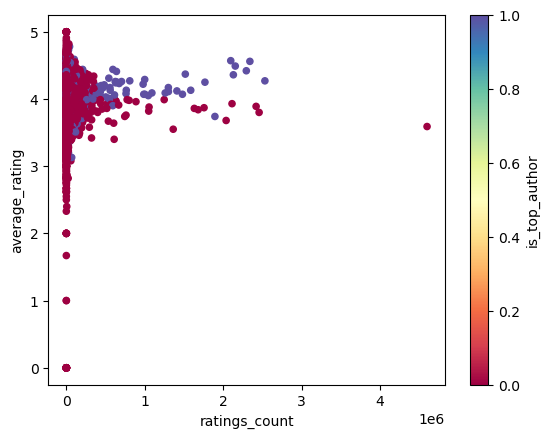

In [75]:
# cmap = plt.get_cmap('Spectral')
df.plot.scatter(x='ratings_count', y='average_rating', c='is_top_author', cmap='Spectral')

<Axes: xlabel='ratings_count', ylabel='average_rating'>

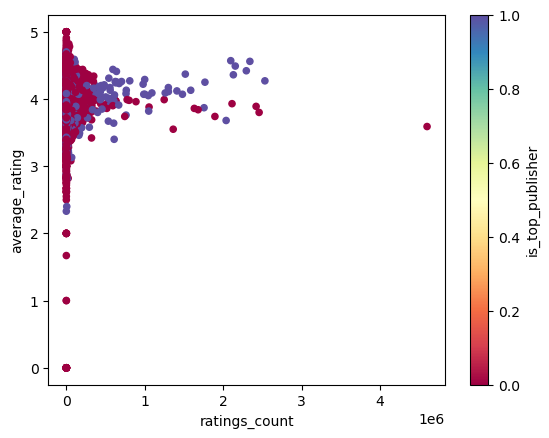

In [76]:
df.plot.scatter(x='ratings_count', y='average_rating', c='is_top_publisher', cmap='Spectral')

<Axes: xlabel='num_pages', ylabel='average_rating'>

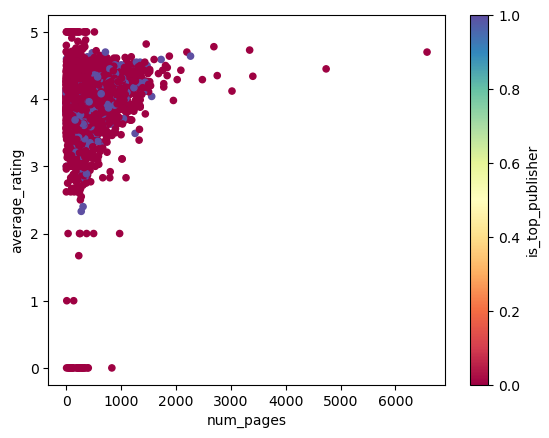

In [77]:
df.plot.scatter(x='num_pages', y='average_rating', c='is_top_publisher', cmap='Spectral')

<Axes: xlabel='num_pages', ylabel='average_rating'>

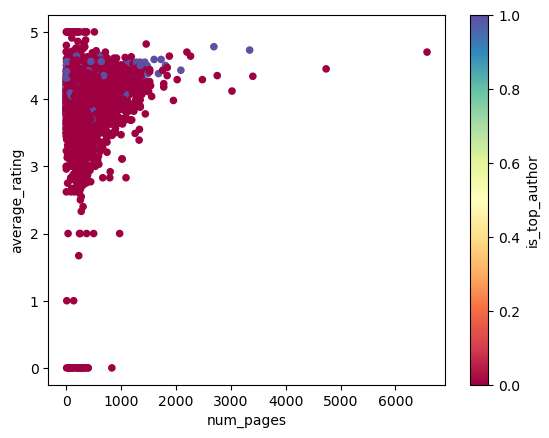

In [78]:
df.plot.scatter(x='num_pages', y='average_rating', c='is_top_author', cmap='Spectral')

<Axes: xlabel='publication_year', ylabel='average_rating'>

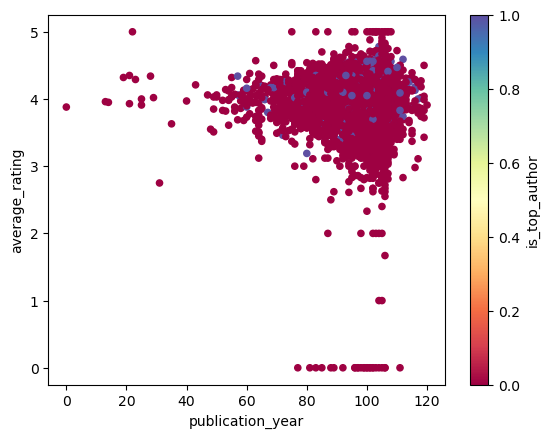

In [79]:
df.plot.scatter(x='publication_year', y='average_rating', c='is_top_author', cmap='Spectral')

### Rating Distribution for the Books

C:\Users\DEEPANSHU\AppData\Local\Temp\ipykernel_30680\1135393914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating, bins=20)


<Axes: xlabel='average_rating', ylabel='Density'>

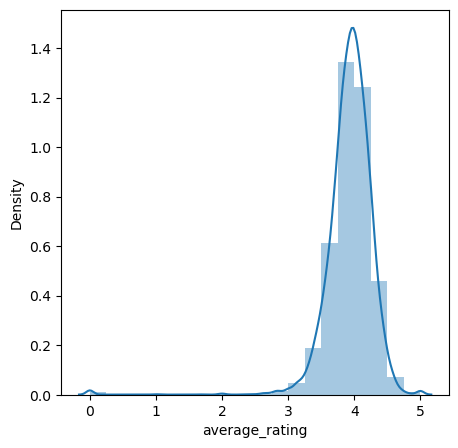

In [80]:
plt.figure(figsize=(5,5))
rating= df.average_rating
sns.distplot(rating, bins=20)

We see that the distribution curve is negatively skewed. This implies that most of the average ratings are concentrated between 3 to 5. However, 5 is rare

### Language 

In [81]:
language=df.language_code.value_counts()

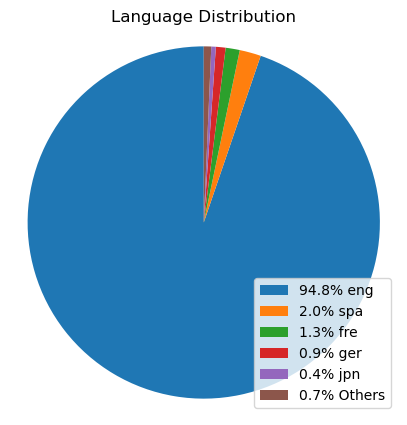

In [82]:
#Languages to keep
sorted_languages = language.index.tolist()
top_5_lang=sorted_languages[:5]
top_5_lang

#Other languages
other_languages=language.loc[~language.index.isin(top_5_lang)].sum()

#Create a new series with the top languages and others
selected_languages = pd.Series(data=language.loc[top_5_lang].tolist() + [other_languages],
                               index=top_5_lang + ['Others'])

#Plotting the above language data on a pie chart
# Create the pie chart
plt.figure(figsize=(5,5))
lang_legend=['English','Spanish','French','German','Japanese', 'Others']
patches, _, autotexts = plt.pie(selected_languages, labels=None, autopct='', startangle=90)
plt.title('Language Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a custom legend with percentage values
percentage_labels = [f'{p:.1f}% {label}' for p, label in zip(selected_languages / selected_languages.sum() * 100, selected_languages.index)]
plt.legend(patches, percentage_labels, loc='lower right')

# Display the pie chart
plt.show()

In [83]:
#df.groupby(['language_code']).sum().plot(kind='pie', y='average_rating', figsize=(5, 12))

In [84]:
# majority of the data is for english no need to take language code

#df.drop(columns= ['language_code'])

### Let's remove outliers out the data. 


<Axes: >

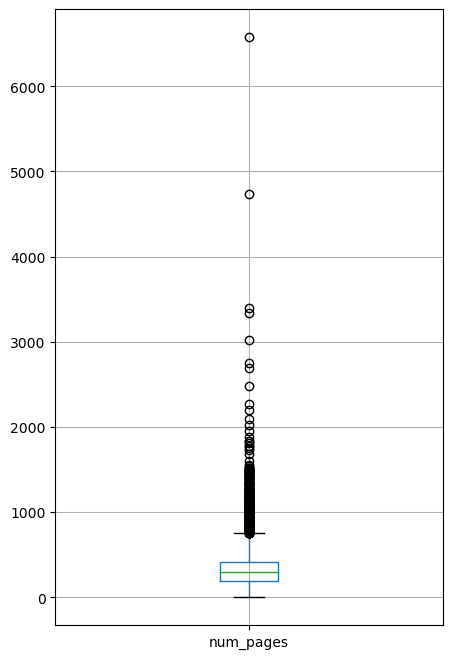

In [85]:
df.boxplot('num_pages', figsize=(5, 8))

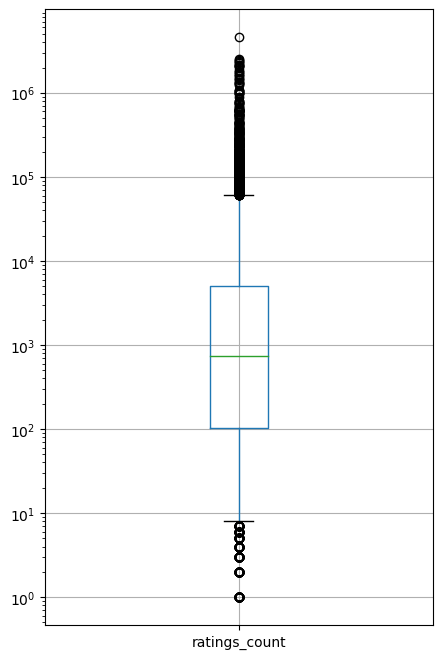

In [86]:
# df.boxplot('ratings_count', figsize=(15, 15))
import matplotlib.pyplot as plt

axes = df.boxplot(column='ratings_count', figsize=(5, 8),
                   whis=[5, 95], return_type='axes')
axes.set_yscale('log')
# for ax in axes.values():
#     ax.set_ylim(-2.5, 2.5)

plt.show()

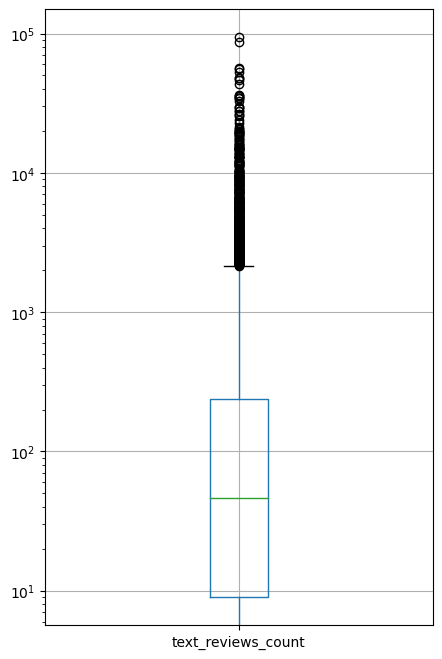

In [87]:
import matplotlib.pyplot as plt

axes = df.boxplot(column='text_reviews_count', figsize=(5, 8),
                   whis=[5,95], return_type='axes')
axes.set_yscale('log')

In [88]:
np.percentile(df.ratings_count, 97)

106816.93999999968

In [89]:
np.percentile(df.text_reviews_count, 97)

3532.4399999999987

In [90]:
eligible_df = df.loc[ (df.loc[:, 'ratings_count'] < 100000) & (df.loc[:, 'num_pages'] < 1000) & (df.loc[:, 'text_reviews_count'] < 3500), :]

In [91]:
#Drop Year and Language_code
drop_col=['language_code','year']

eligible_df.drop(drop_col,axis=1, inplace=True)

C:\Users\DEEPANSHU\AppData\Local\Temp\ipykernel_30680\2618484774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_df.drop(drop_col,axis=1, inplace=True)


In [95]:
title_df = eligible_df.loc[:, 'title']

In [96]:
eligible_df

,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,publication_month,is_top_author,is_top_publisher
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,103,1247,1,0
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",3.74,152,19,1,105,1264,0,0
7,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,815,3628,254,105,1271,0,0
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,215,4930,460,104,1256,0,0
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,6,1266,253,105,1263,0,0
...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,4.06,512,156,20,104,1260,0,0
11123,You Bright and Risen Angels,4.08,635,783,56,88,1068,0,1
11124,The Ice-Shirt (Seven Dreams #1),3.96,415,820,95,93,1124,0,1
11125,Poor People,3.72,434,769,139,107,1286,0,0


In [97]:
eligible_df.corr()

C:\Users\DEEPANSHU\AppData\Local\Temp\ipykernel_30680\3252146839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  eligible_df.corr()


,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,publication_month,is_top_author,is_top_publisher
average_rating,1.000000,0.100259,0.061323,0.013675,-0.028323,-0.027583,0.070135,-0.026513
num_pages,0.100259,1.000000,0.101035,0.088007,-0.004392,-0.003870,-0.009398,0.078692
ratings_count,0.061323,0.101035,1.000000,0.848937,0.083517,0.083276,0.061988,0.093566
text_reviews_count,0.013675,0.088007,0.848937,1.000000,0.112833,0.112303,0.041192,0.116309
publication_year,-0.028323,-0.004392,0.083517,0.112833,1.000000,0.999417,-0.002066,-0.035252
publication_month,-0.027583,-0.003870,0.083276,0.112303,0.999417,1.000000,-0.001703,-0.035407
is_top_author,0.070135,-0.009398,0.061988,0.041192,-0.002066,-0.001703,1.000000,0.040206
is_top_publisher,-0.026513,0.078692,0.093566,0.116309,-0.035252,-0.035407,0.040206,1.000000


In [98]:
eligible_df['top_author_publisher'] = eligible_df.loc[:, 'is_top_author'] * eligible_df.loc[:, 'is_top_publisher']


C:\Users\DEEPANSHU\AppData\Local\Temp\ipykernel_30680\3450891448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_df['top_author_publisher'] = eligible_df.loc[:, 'is_top_author'] * eligible_df.loc[:, 'is_top_publisher']


In [99]:
eligible_df = eligible_df.drop(columns=['title'])

###  Lets separate out X and y

In [100]:

X = eligible_df.iloc[:, 1:]
y = eligible_df.iloc[:, 0]

###  No need to apply min max scaler. As it is NOT affecting model performance.

In [103]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
st_scaler= StandardScaler()
# X = st_scaler.fit_transform(X)


In [116]:
X.head()

,num_pages,ratings_count,text_reviews_count,publication_year,publication_month,is_top_author,is_top_publisher,top_author_publisher
2,352,6333,244,103,1247,1,0,0
5,152,19,1,105,1264,0,0,0
7,815,3628,254,105,1271,0,0,0
9,215,4930,460,104,1256,0,0,0
10,6,1266,253,105,1263,0,0,0


### We can try feeding this data to linear regression model to get a quick baseline. 

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [108]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
predictions = lr.predict(X_test)

In [110]:
# evaluate the performance of the algorithm
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

MAE: 0.23
MSE: 0.13
RMSE: 0.36


#### Lets plot some scores from X_test

                                                   title  Actual  Predicted
9132   Here  There and Everywhere: My Life Recording ...    4.25   3.919732
7000                                  The Long Road Home    4.00   3.954177
3875   The Botany of Desire: A Plant's-Eye View of th...    4.06   3.852633
4389                                            Sideways    3.69   3.901050
10296                     The Navigator (NUMA Files  #7)    3.94   3.938103


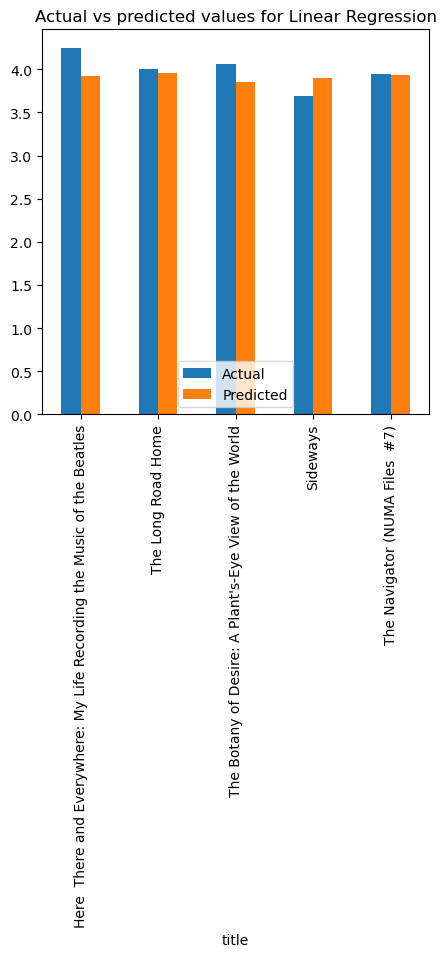

In [111]:
#For Linear Regression Sample of Actual vs Predicted Value
predictions_comparision = pd.DataFrame({'title': title_df[X_test.index], 'Actual': y_test, 'Predicted': predictions}).sample(5)
predictions_comparision.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for Linear Regression")
print(predictions_comparision)

### A better way to train the model is to use KFold Cross validation. Here k=4

In [112]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression


k = 4
kf = KFold(n_splits=k, random_state=None)
lr_model= LinearRegression()

result = cross_val_score(lr_model , X, y, scoring='neg_mean_squared_error', cv = kf)

print("Avg accuracy: {}".format(result.mean().round(2)))

Avg accuracy: -0.12


In [113]:
result

array([-0.11434196, -0.11427837, -0.13534388, -0.13040258])

Install xgboost library before proceeeding further.
``` 
!pip install xgboost
```

### Now we will compare linear regression against XG Boost, Random Forest and Decison Tree. 

#### For fair comparsion we will give the same split of X_train and y_train to all the models. 

Fold = 1
The accuracy of linear regression is 0.11
The accuracy of Decsion Tree is 0.19
The accuracy of XG Boost is 0.11999999731779099
The accuracy of Random Forest is 0.1
Fold = 2
The accuracy of linear regression is 0.11
The accuracy of Decsion Tree is 0.2
The accuracy of XG Boost is 0.11999999731779099
The accuracy of Random Forest is 0.11
Fold = 3
The accuracy of linear regression is 0.14
The accuracy of Decsion Tree is 0.21
The accuracy of XG Boost is 0.12999999523162842
The accuracy of Random Forest is 0.11
Fold = 4
The accuracy of linear regression is 0.13
The accuracy of Decsion Tree is 0.22
The accuracy of XG Boost is 0.15000000596046448
The accuracy of Random Forest is 0.12
----------------------Consolidated Results-----------------------------
The accuracy of linear regression is 0.12
The accuracy of XG Boost is 0.12999999523162842
The accuracy of Random Forest is 0.11
The accuracy of Decision Tree is 0.21
----Some Predicted values for Linear Regression ----
               

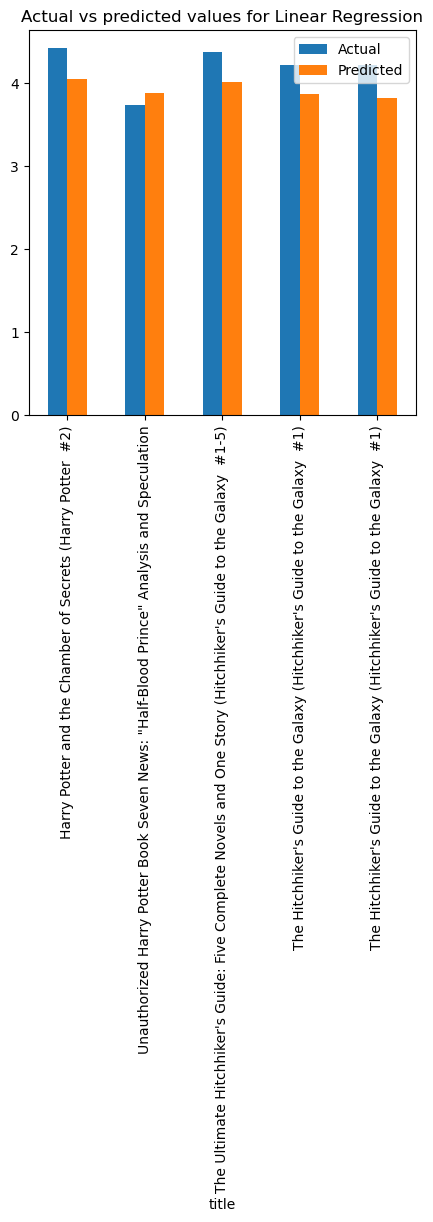

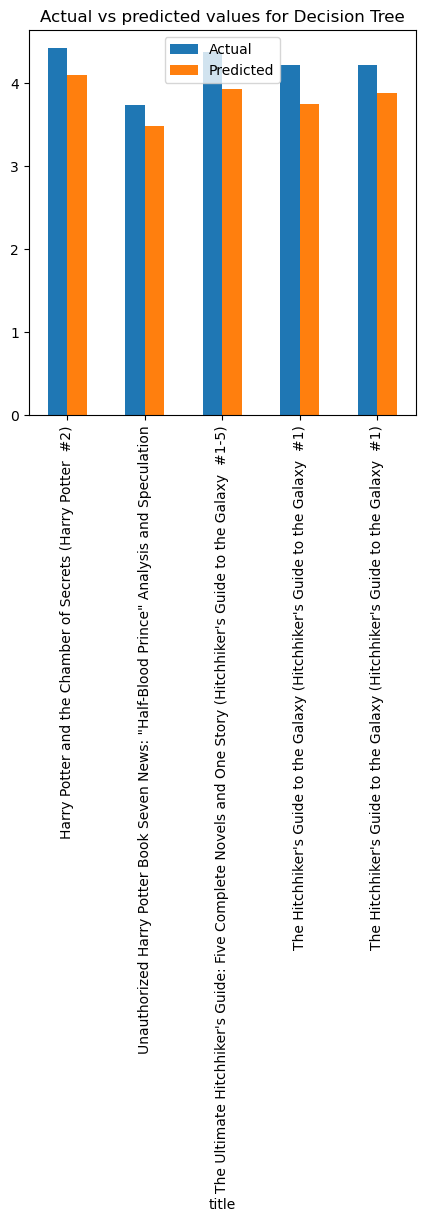

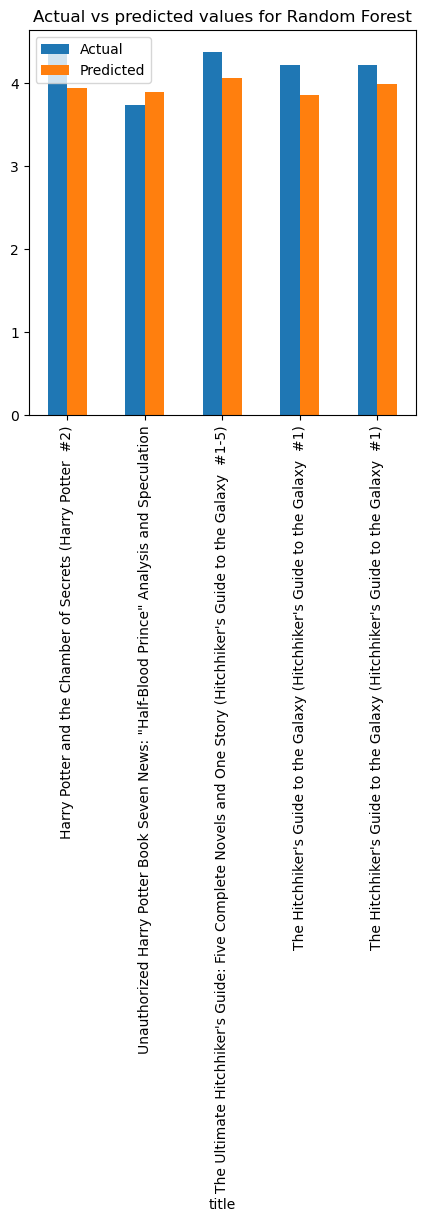

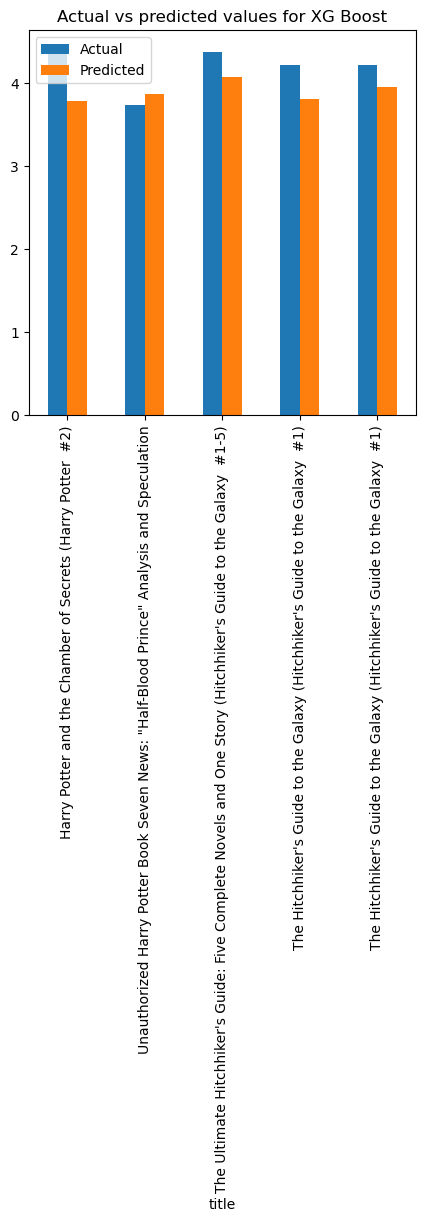

In [115]:
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

predicted_values_lr = []
predicted_values_dt = []
predicted_values_rf = []
predicted_values_xg = []

result_lr = []
result_xg = []
result_rf = []
result_dt = []


actual_values = []

X_test_total = pd.DataFrame()
i = 0 

for train_index, test_index in kf.split(X):
    print("Fold = {}".format(i+1))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    actual_values.extend(y_test)
    X_test_total = pd.concat((X_test_total, X_test), axis=0)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    predicted_values_lr.extend(y_pred_lr)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    result_lr.append(mse_lr)
    print("The accuracy of linear regression is {}".format(mse_lr.round(2)))
    
    model_dt = tree.DecisionTreeRegressor()
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    predicted_values_dt.extend(y_pred_dt)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    result_dt.append(mse_dt)
    print("The accuracy of Decsion Tree is {}".format(mse_dt.round(2)))
    
    model_xg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    model_xg.fit(X_train, y_train)
    y_pred_xg = model_xg.predict(X_test)
    predicted_values_xg.extend(y_pred_xg)
    mse_xg = mean_squared_error(y_test, y_pred_xg)
    result_xg.append(mse_xg)
    print("The accuracy of XG Boost is {}".format(mse_xg.round(2)))
    
    regr = RandomForestRegressor(max_depth=5, random_state=0)
    regr.fit(X_train, y_train)
    y_pred_rf = regr.predict(X_test)
    predicted_values_rf.extend(y_pred_rf)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    result_rf.append(mse_rf)
    print("The accuracy of Random Forest is {}".format(mse_rf.round(2)))
    
    i += 1

result_lr = np.mean(np.array(result_lr))
result_xg = np.mean(np.array(result_xg))
result_rf = np.mean(np.array(result_rf))
result_dt = np.mean(np.array(result_dt))

print("----------------------Consolidated Results-----------------------------")
print("The accuracy of linear regression is {}".format(result_lr.round(2)))
print("The accuracy of XG Boost is {}".format(result_xg.round(2)))
print("The accuracy of Random Forest is {}".format(result_rf.round(2)))
print("The accuracy of Decision Tree is {}".format(result_dt.round(2)))

#For Linear Regression Sample of Actual vs Predicted Value
predictions_comparision_lr = pd.DataFrame({'title': title_df[X_test_total.index],'Actual': actual_values, 'Predicted': predicted_values_lr}).head(5)
predictions_comparision_lr.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for Linear Regression")
print("----Some Predicted values for Linear Regression ----")
print(predictions_comparision_lr)

#For DT Sample of Actual vs Predicted Value
predictions_comparision_dt = pd.DataFrame({'title': title_df[X_test_total.index],'Actual': actual_values, 'Predicted': predicted_values_dt}).head(5)
predictions_comparision_dt.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for Decision Tree")
print("----Some Predicted values for Decision tree ----")
print(predictions_comparision_dt)


#For Random Forest Sample of Actual vs Predicted Value
predictions_comparision_rf = pd.DataFrame({'title': title_df[X_test_total.index],'Actual': actual_values, 'Predicted': predicted_values_rf}).head(5)
predictions_comparision_rf.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for Random Forest")
print("----Some Predicted values for Random Forest ----")
print(predictions_comparision_rf)

#For xg boost Sample of Actual vs Predicted Value
predictions_comparision_xg = pd.DataFrame({'title': title_df[X_test_total.index],'Actual': actual_values, 'Predicted': predicted_values_xg}).head(5)
predictions_comparision_xg.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for XG Boost")
print("----Some Predicted values for XG Boost ----")
print(predictions_comparision_xg)



### Since loss of Random Forest is least. So it won. 

As compared to all the models, linear regression model and random forest model have higher accuracy as their negative mean square error is higher than the other models. They have a negative mean square error of -0.11 and -0.12.

(Please note, in scikit scores are always supposed to be maximized. Hence, we use negative mean square error instead of mean square error. We need to maximize this error meaning, closer to 0 better the model.)

### Interactive Graphs and Charts Showing Relationship between the Features


#### Install mpl cursors using

`!pip install mplcursors`

In [122]:
#Importing the libraries for interactive plots
import seaborn as sns
import matplotlib.pyplot as plt
from mplcursors import cursor

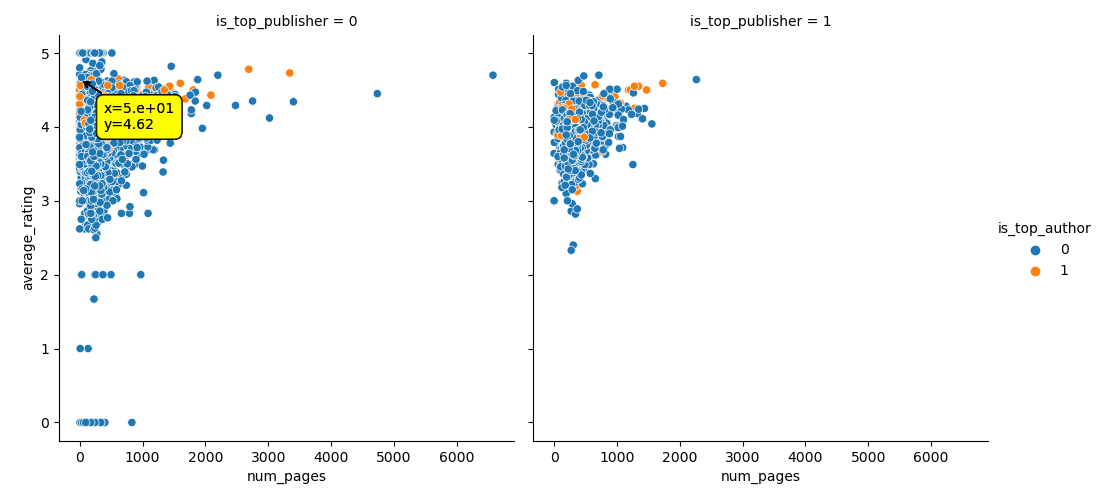

In [123]:
import os
from IPython.display import Image, display

#Chart 1
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_1.png')
display(Image(filename=img_full))

Using 
```
%matplotlib qt

sns.relplot(data=df, x="num_pages", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

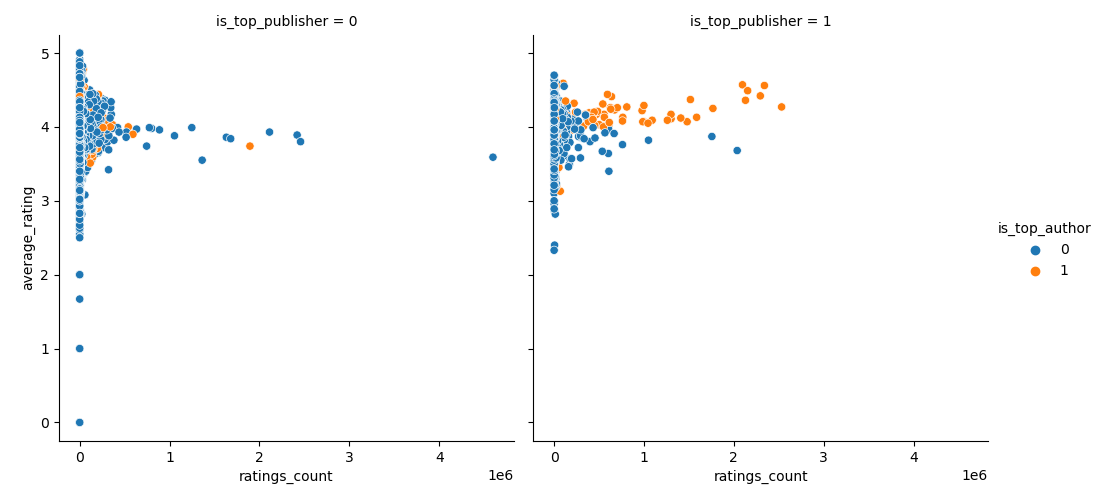

In [124]:
#Chart 2
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_2.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="ratings_count", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

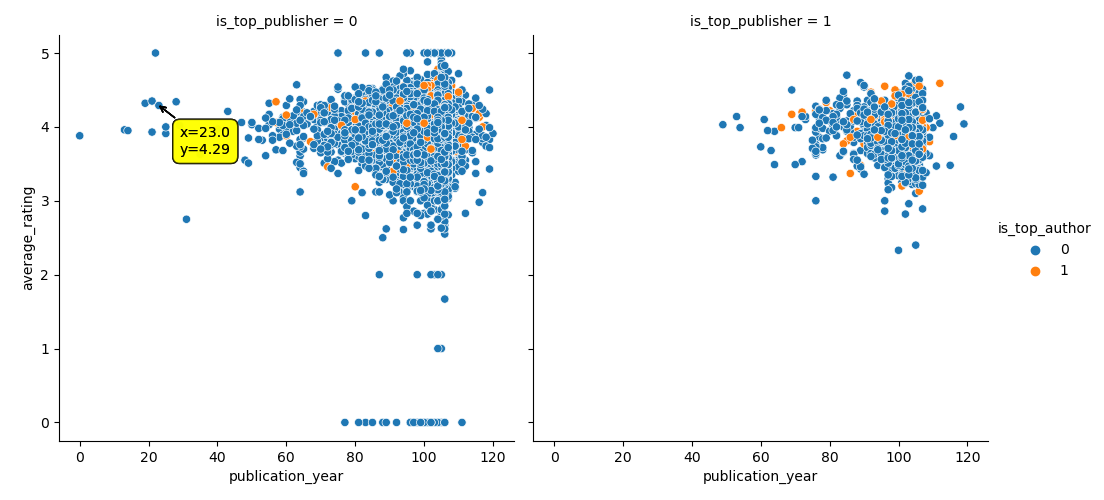

In [125]:
#Chart 3
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_3.png')
display(Image(filename=img_full))

Using 
```
%matplotlib qt

sns.relplot(data=df, x="publication_year", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

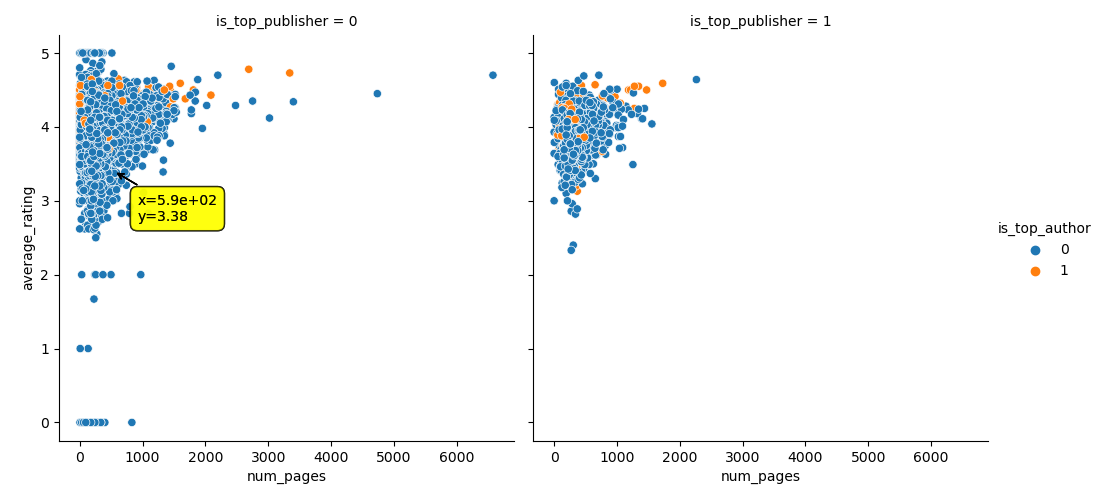

In [126]:
#Chart 4
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_4.png')
display(Image(filename=img_full))

Using 
```
%matplotlib qt

sns.relplot(data=df, x="num_pages", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

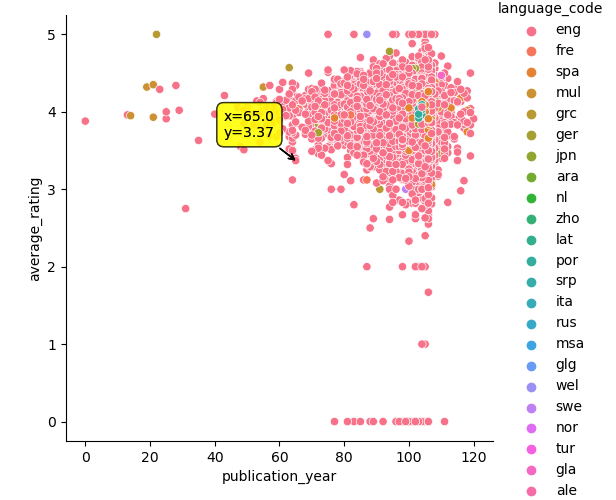

In [127]:
#Chart 5
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_5.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="publication_year", y="average_rating", hue="language_code")
cursor(hover=True)
plt.show()
```

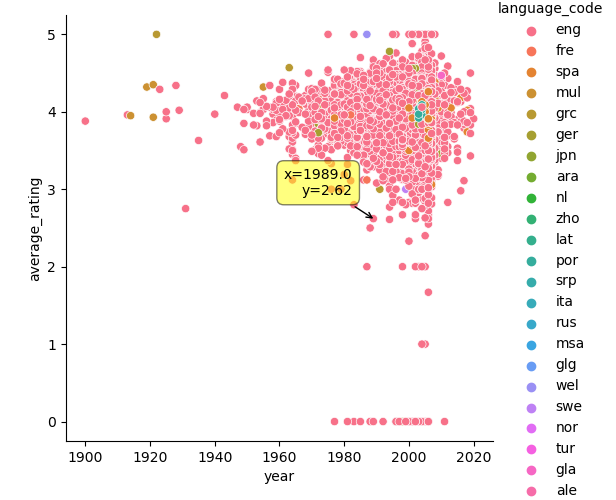

In [128]:
#Chart
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="year", y="average_rating", hue="language_code")
cursor(hover=True)
plt.show()
```

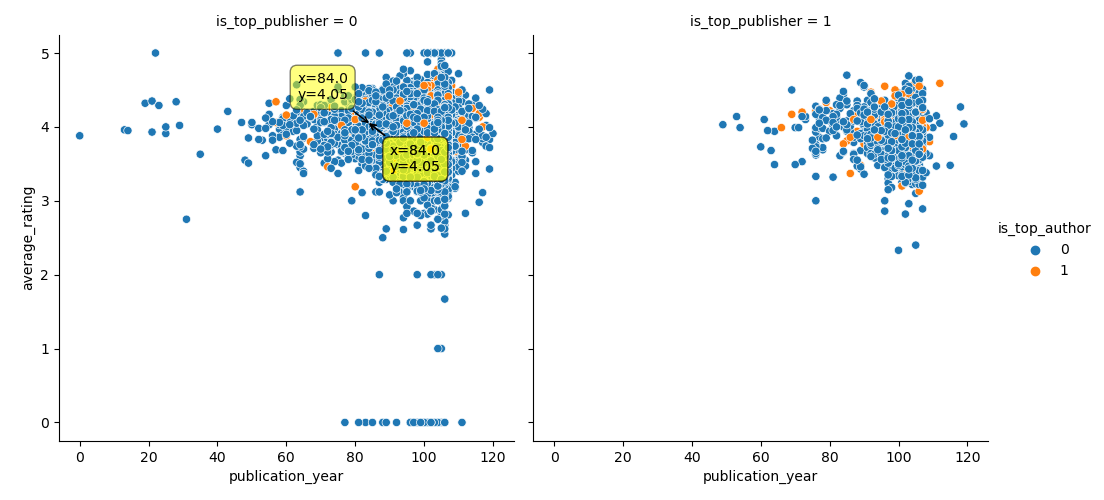

In [129]:
#Chart 6
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_6.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="publication_year", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

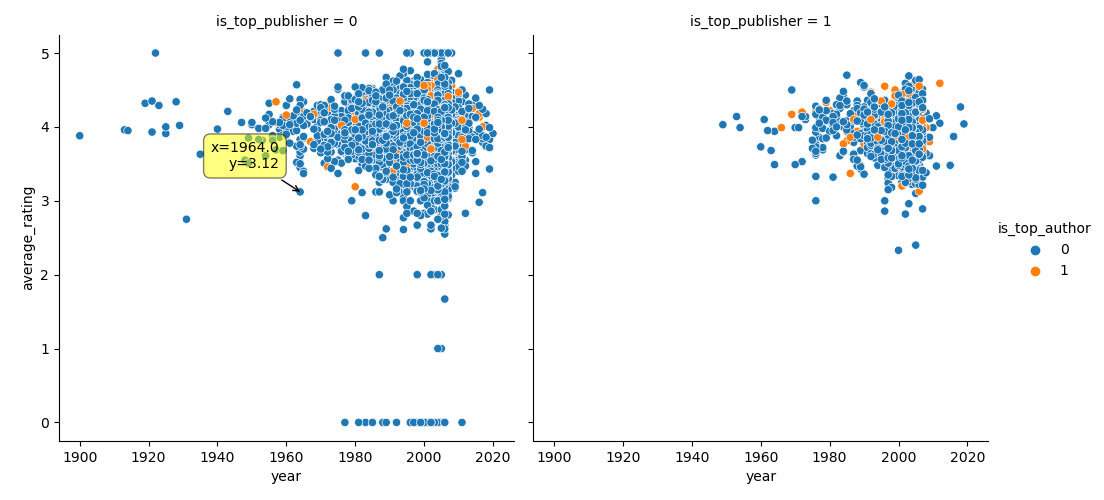

In [130]:
#Chart 6b
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_6b.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="year", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

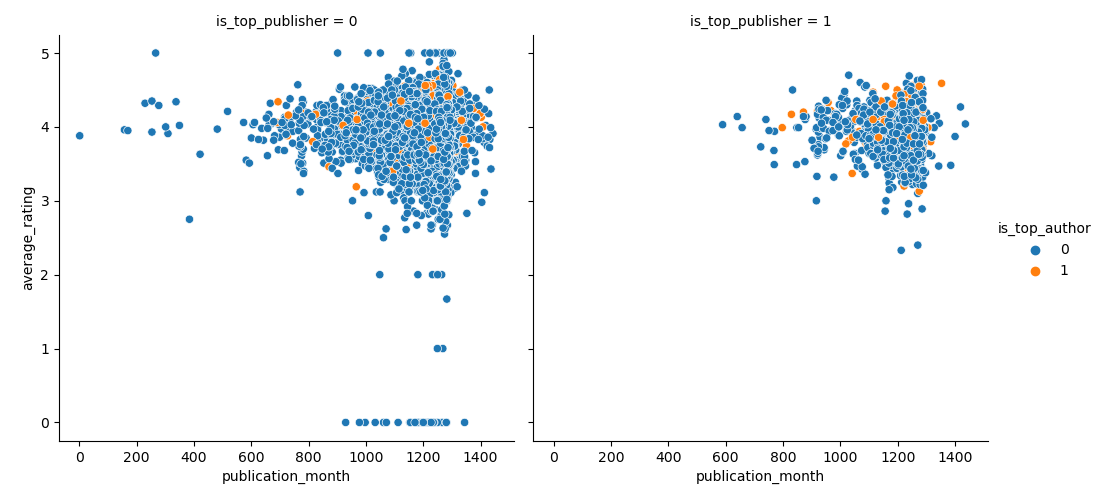

In [131]:
#Chart 7
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_7.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="publication_month", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

### Did the books with most text_reviews_count receive a high rating

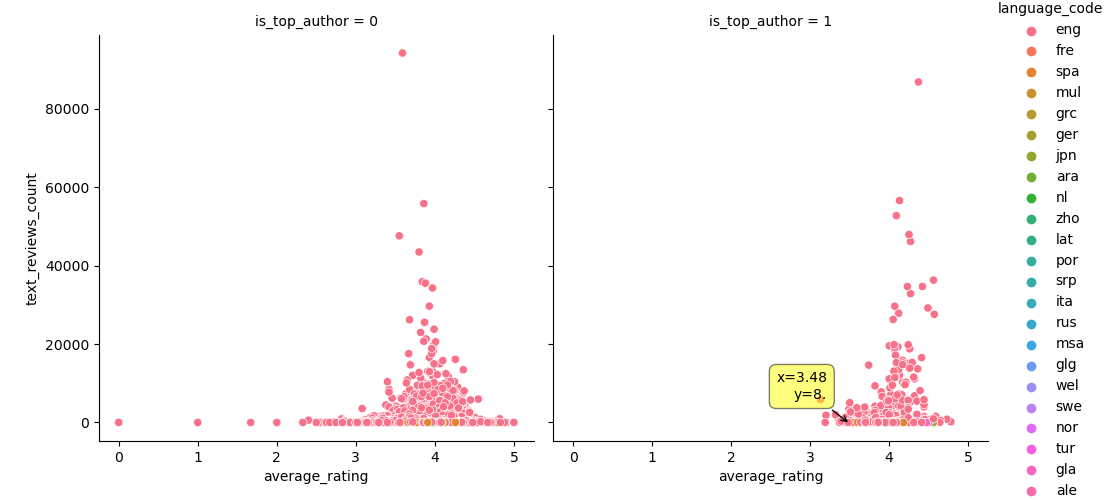

In [132]:
#Chart 8
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_8.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="average_rating", y="text_reviews_count", hue="language_code", col="is_top_author")
cursor(hover=True)
plt.show()
```

In the dataset, the average rating is concentrated between 3-5. For high text review count, the books are usually rated around 4

### Relationship between Highest Rating and Number of Pages

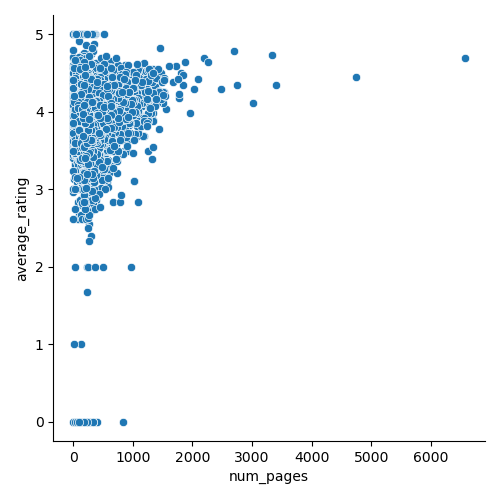

In [133]:
#Chart 9
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_9.png')
display(Image(filename=img_full))

Using
```
sns.relplot(data=df, x="num_pages", y="average_rating")
cursor(hover=True)
plt.show()
```

Most of the books with number of pages<2000 have an average rating between 3-4. This graph doesnt help in concluding anything. Let's explore a bit more for number of pages<2000

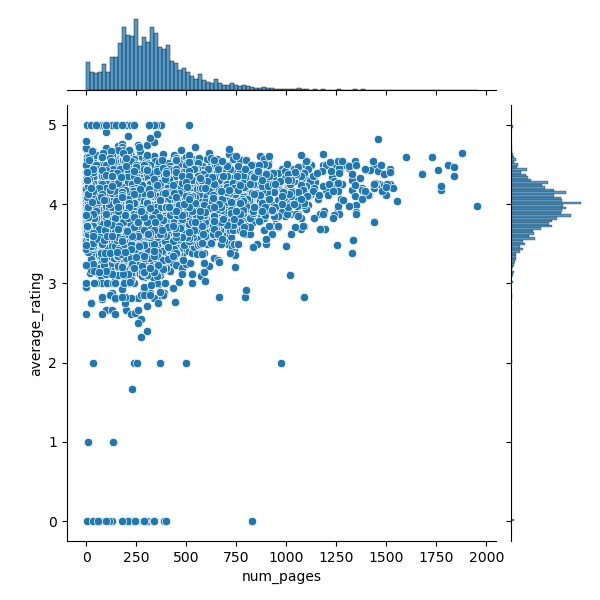

In [134]:
#Chart 10
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_10.png')
display(Image(filename=img_full))

Using
```
explore=df[~(df['num_pages']>2000)]

sns.jointplot(data=explore, x="num_pages", y="average_rating")
cursor(hover=True)
plt.show()
```

Based on the jointplot above, we can infer that readers prefer reading books between 200-300 pages and rate them between 3-5